### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Explainable AI. We will be using the Breast Cancer Dataset and here is a brief context about the same:

Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control. Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women, but men can get breast cancer, too.
A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

As part of the assignment, you will have to accomplish the below tasks.

**Author:** Ayoub Berdeddouch

###**Dataset**

Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv

**About the dataset:**

Different features related to the breast are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.


* id: Id number
* agnosis: Cancer is Malignant or Benign (M = malignant, B = benign) - target variable

Other 20 features contain information about following 10 real valued features

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry  
* fractal dimension ("coastline approximation" - 1)

# Task 1

## Import Necessary Libraries

In [ ]:
!pip install shap

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

import shap

     |████████████████████████████████| 371 kB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509226 sha256=7fa8f1b53edd82b23611547abfb59d5d061bf0be65fcbbedaf25d2dda0073129
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


## Load the data
Display the first 5 rows of the data after loading.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv')
df.head(5)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,914102,13.16,20.54,84.06,538.7,0.07335,0.05275,0.01800,0.01256,0.1713,0.05888,0.3237,1.473,2.326,26.07,0.007802,0.02052,0.01341,0.005564,0.02086,0.002701,14.50,28.46,95.29,648.3,0.1118,0.1646,0.07698,0.04195,0.2687,0.07429,B
1,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,0.4384,1.907,3.149,30.66,0.006587,0.01815,0.01737,0.013160,0.01835,0.002318,13.50,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757,B
2,88466802,10.65,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.493,1.497,16.64,0.007189,0.01035,0.01081,0.006245,0.02158,0.002619,12.25,35.19,77.98,455.7,0.1499,0.1398,0.11250,0.06136,0.3409,0.08147,B
3,9111843,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,0.1912,1.705,1.516,13.86,0.007334,0.02589,0.02941,0.009166,0.01745,0.004302,13.09,37.88,85.07,523.7,0.1208,0.1856,0.18110,0.07116,0.2447,0.08194,B
4,84862001,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,0.5692,1.073,3.854,54.18,0.007026,0.02501,0.03188,0.012970,0.01689,0.004142,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.47840,0.20730,0.3706,0.11420,M


## Perform Basic Exploratory Data Analysis (EDA)

In [ ]:
print(df.shape)

(398, 32)


- Dataset comprises of 398 observations and 32 characteristics.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

- Data has float and integer values, and one object type value corresponding to our target value.
- No variable column has null/missing values.

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,3.076209e+07,14.070997,19.331985,91.589121,651.631910,0.096289,0.103197,0.087454,0.047821,0.181122,0.062800,0.408930,1.208941,2.897574,40.869198,0.007109,0.025200,0.032094,0.011780,0.020624,0.003767,16.202219,25.647286,106.882337,876.737186,0.132595,0.249983,0.269575,0.112627,0.288792,0.083445
std,1.277890e+08,3.577839,4.221225,24.706388,358.679197,0.012988,0.050805,0.079728,0.038329,0.026829,0.006794,0.287366,0.530928,2.148714,48.740479,0.003016,0.017410,0.032599,0.006423,0.008430,0.002644,4.898797,6.171891,34.370030,581.202196,0.022235,0.150280,0.210256,0.065617,0.058800,0.016469
min,8.913000e+03,6.981000,10.720000,43.790000,143.500000,0.052630,0.026500,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.002826,0.003012,0.000000,0.000000,0.007882,0.000950,7.930000,12.870000,50.410000,185.200000,0.084840,0.043270,0.000000,0.000000,0.156500,0.055040
25%,8.674750e+05,11.645000,16.172500,74.690000,415.375000,0.086635,0.066013,0.028010,0.019787,0.161650,0.057717,0.227150,0.828900,1.565250,17.602500,0.005237,0.013015,0.015100,0.007516,0.015023,0.002272,12.980000,20.807500,83.730000,510.325000,0.116875,0.148600,0.116500,0.063533,0.250050,0.071240
50%,9.055295e+05,13.205000,18.895000,85.660000,538.300000,0.096515,0.095090,0.059935,0.033420,0.179300,0.061770,0.324650,1.141000,2.306000,24.380000,0.006374,0.020210,0.025265,0.011050,0.018780,0.003162,14.800000,25.225000,96.085000,671.500000,0.131600,0.211750,0.223050,0.100465,0.280650,0.080210
75%,8.812818e+06,15.745000,21.660000,103.700000,780.325000,0.105300,0.129550,0.126675,0.068282,0.195675,0.066188,0.501175,1.466750,3.463750,45.732500,0.008300,0.031993,0.041955,0.014770,0.023203,0.004488,18.540000,29.622500,125.075000,1048.500000,0.146375,0.330650,0.377400,0.157250,0.316875,0.091990
max,9.113205e+08,28.110000,33.810000,188.500000,2501.000000,0.132600,0.345400,0.426400,0.191300,0.290600,0.095750,2.873000,3.896000,21.980000,542.200000,0.031130,0.106400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.252000,0.291000,0.577400,0.148600


- We can observe that the mean of each column (!=id) is greater than the median.

In [ ]:
df.diagnosis.unique()

array(['B', 'M'], dtype=object)

- Target variable is discrete and categorical.

In [ ]:
df.diagnosis.value_counts()/df.diagnosis.count()

B    0.628141
M    0.371859
Name: diagnosis, dtype: float64

- We can see that approximately 62% of the cancers in the dataset are benign while 37% are malign.

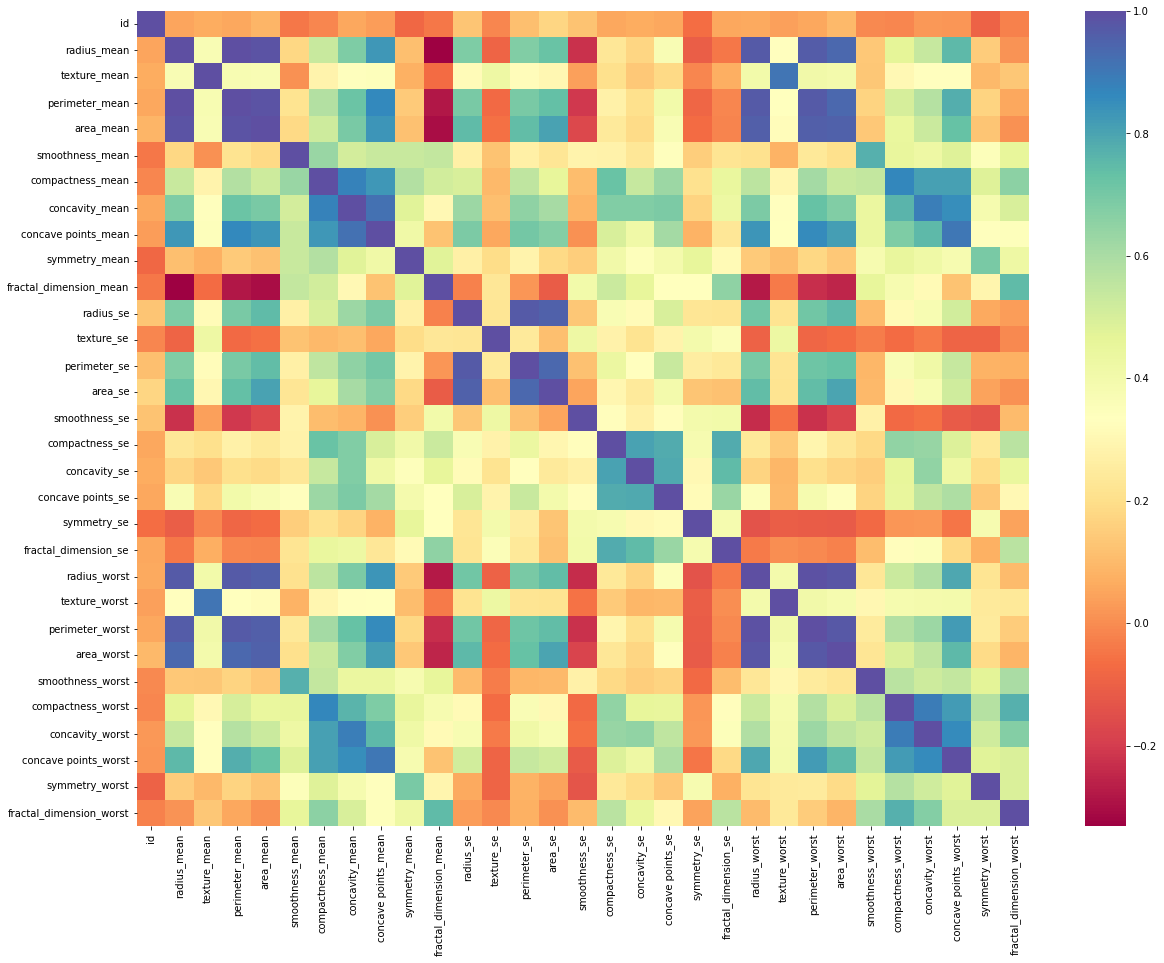

In [ ]:
import seaborn as sn
plt.figure(figsize=(20,15))
sn.heatmap(df.corr(),cmap="Spectral")

- We can see that our data contains some characteristics which are strongly correlated such as perimeter_mean and area_mean.

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.

In [ ]:
Y = df['diagnosis'].apply(lambda x: 0 if x == 'B' else 1) # 0 : B and 1 : M
X = df.loc[:,:'fractal_dimension_worst']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Task 2

## Use Random Forest Machine Learning Model for prediction

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=500, max_depth=5)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

## Evaluate the model using Accuracy Score

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.95


# Task 3: Explaining the model with SHAP and Lime.

##  Use a SHAP Explainer to derive SHAP Values for the random forest ml model.

In [ ]:
#Creating an explainer for our model
explainer = shap.TreeExplainer(clf) 

#Finding out the shap values using the explainer
shap_values = explainer.shap_values(X_test)
len(shap_values)

2

## Write your inferences from the generated plot.

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0],shap_values[0][0,:],X_test.iloc[0,:])


1
[0.65487421 0.34512579]


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1],shap_values[1][0,:],X_test.iloc[0,:])

## Write your inferences from the generated plot.


SHAP gives a nice reasoning above showing which features were the most influential in the model, taking the correct decision of predicting the probability of classifying the cancer as benign (0) or malign (1).

**Case 1 : Benign (0)**

The explanation shows features each contributing to push the model output from the base value which is ***0.6549*** to the actual model output which is ***0.3***.

Features pushing the prediction higher are shown in red **(radius_worst, area_worst)**, those pushing the prediction lower are in blue **(the rest of the features like perimeter_worst, concavity_mean..)**.

The addition of the effects of each of the features contributed in making the probability of getting 0 lower than the base value, and since the final value(displayed in bold) is much lower than the base value. Thus, it is classified in the malign category.

**Case 2 : Malign (1)**

Intuitively, we'll have the opposite of what we observed for the case of benign case which is shown by the plot. As we can see, the features **(radius_worst, area_worst**) are now contributing in pushing down the base value ***0.3451*** to the actual value ***0.7*** while the other push it up.

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0],shap_values[0],X_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1],shap_values[1],X_test)

## Write your inferences from the generated plot.

We order the samples by similarity in order to find some interesting model prediction patterns.

**Case 1 : Benign (0)**

- The first 40  test samples are classified as benign since the probability of predicting 0 is higher than 0.5 and they have a area_worst approximatelly equal to 550 and an radius_worst that is approximately equal to 12.

- The next 13 test samples have a decreasing probability of predicting 0 then the first ones are classified as benign and the last ones as malign. We also observe that the decrease of this probability is accompagnied by a increase of the radius_worst and an increase in the perimeter_worst.

- The remaining test samples are classified as malign since the probability of predicting 0 is less than 0.5 and they have a high radius_worst approximatelly equal to 24 and a high perimeter_worst that is approximately equal to 120.

**Case 2 : Malign (1)**

- We observe the opposite of what we've seen earlier which is intuitive since it's a binary classification.


# Task 6

## Plot a SHAP summary plot using all the features in the data

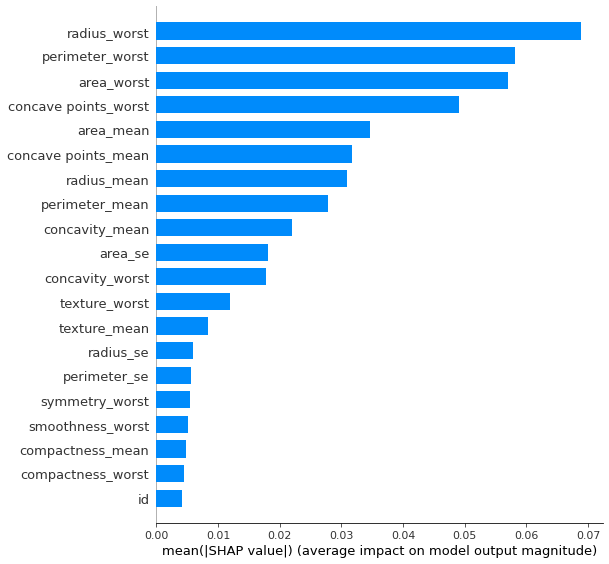

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[0], X_test, plot_type="bar")

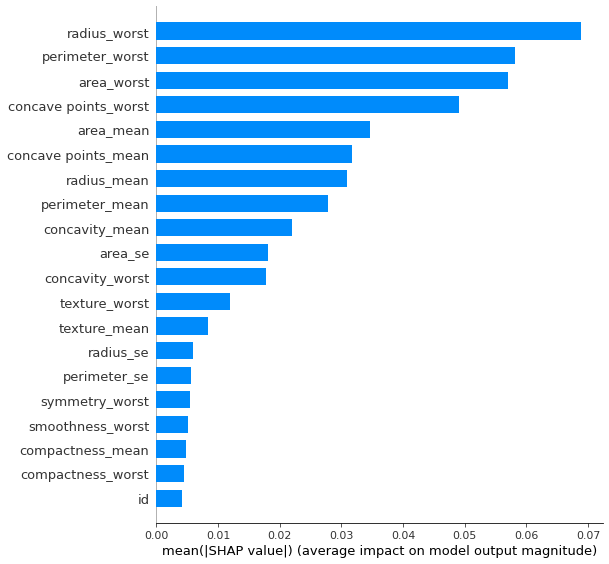

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

## Write your inferences from the generated plot.

  - From the above simple bar charts, we observe that radius_worst and area_worst and perimeter_worst are the top 3 important features while predicting the nature of the cancer. On the other hand, compactness_worst and compactness_mean are the least important features while determining it.

# Task 7

##Plot a SHAP dependecne plot using all features in the data

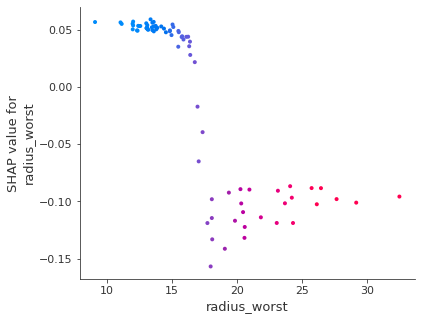

In [ ]:
#PDP of ‘radius_worst’ affecting model prediction (0)
shap.initjs()
shap.dependence_plot(ind='radius_worst', interaction_index='radius_worst',shap_values=shap_values[0], features=X_test)

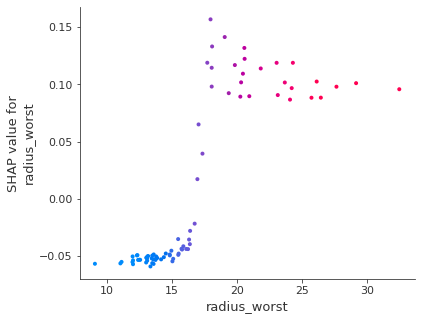

In [ ]:
#PDP of ‘radius_worst’ affecting model prediction (1)
shap.initjs()
shap.dependence_plot(ind='radius_worst', interaction_index='radius_worst',shap_values=shap_values[1], features=X_test)

## Write your inferences from the generated plot.

- First of all, we observe that the two plots are symmetrical to the x-axis, because we have a binary classification. Thus, we'll only gibe inferences from the first generated plot **(Benign (0))**.
- As we said earlier, we observe that cancers with low radius_worst have a slightly higher shapley value and hence pushes the model's prediction decisions to say that those cancers are benign, on the contrary those with high radius_worst values have low shapley value and are classified as malign.

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

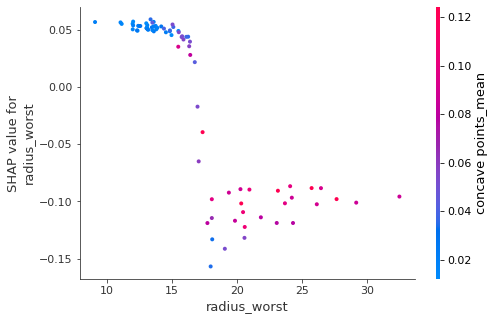

In [ ]:
#Two-way PDP showing interactions between features ‘radius_worst’ and ‘concave points_mean’ and their effect 
shap.initjs()
shap.dependence_plot(ind='radius_worst', interaction_index='concave points_mean', 
                     shap_values=shap_values[0], features=X_test, 
                     display_features=X_test)

Lower the radius_worst and the concave_points_mean, the cancer is classified as **"benign"**.